Let's read 'Datenblattstefan.xls'

In [1]:
# Assess coding style, based on https://stackoverflow.com/a/47204361/323100

%load_ext pycodestyle_magic
# and then put '%%pycodestyle' in the cells

# Or do it like so from the Terminal:
# jupyter nbconvert Load\ Datenblatt\ Stefan.ipynb --to script && flake8 *.py --ignore=W391

In [2]:
import pandas
import matplotlib.pylab as plt
import seaborn
%matplotlib inline
import os

In [3]:
# Display all images in b&w
plt.rc('image', cmap='gray', interpolation='nearest')
# Size up figures a bit
plt.rcParams['figure.figsize'] = (12, 8)
# Save figures with transparent background
plt.rcParams['savefig.transparent'] = True

In [4]:
def get_git_hash():
    """
    Get the current git hash from the repository.
    Based on http://stackoverflow.com/a/949391/323100 and
    http://stackoverflow.com/a/18283905/323100
    """
    from subprocess import Popen, PIPE
    import os
    gitprocess = Popen(['git', '--git-dir', os.path.join(os.getcwd(), '.git'),
                        'rev-parse', '--short', '--verify', 'HEAD'],
                       stdout=PIPE)
    (output, _) = gitprocess.communicate()
    return output.strip().decode("utf-8")

In [5]:
the_current_git_hash = get_git_hash()
print('We are working with version %s of the analyis notebook'
      % the_current_git_hash)

We are working with version 80d5752 of the analyis notebook


In [6]:
# Make us an output folder (including the git hash,
# so we (potentially) have different versions of the images)
imgdir = os.path.join('img', the_current_git_hash)
os.makedirs(imgdir, exist_ok=True)

In [7]:
xl = pandas.ExcelFile('Datenblattstefan.xls')
xl.sheet_names
# >>> df = xl.parse("Sheet1")
# >>> df.head()

['All Groups', 'DAY 4', 'DAY 10', 'DAY 21', 'DAY 36', 'DAY 60', 'Table 1']

In [8]:
# Parse one sheet, skip the unecessary stuff at the top and
# load only the columns that are interesting for us
day04 = xl.parse('DAY 4',
                 skiprows=12,
                 usecols=(0, 2, 3, 4, 5, 9),
                 names=('CoEx', 'Name', 'Animal', 'Body weight',
                        'Volume total lung', 'Volume RUL'))
# Clean up the import
day04 = day04[pandas.notnull(day04['Name'])]
day04 = day04[day04.Animal != 'MEAN']
day04.index = 'R' + day04['Name'] + day04['Animal']

In [9]:
# Parse another sheet
day10 = xl.parse('DAY 10',
                 skiprows=12,
                 usecols=(0, 2, 3, 4, 5, 9),
                 names=('CoEx', 'Name', 'Animal', 'Body weight',
                        'Volume total lung', 'Volume RUL'))
day10 = day10[pandas.notnull(day10['Name'])]
day10 = day10[day10.Animal != 'MEAN']
day10.index = 'R' + day10['Name'] + day10['Animal']

In [10]:
# Parse one more sheet
day21 = xl.parse('DAY 21',
                 skiprows=12,
                 usecols=(0, 2, 3, 4, 5, 9),
                 names=('CoEx', 'Name', 'Animal', 'Body weight',
                        'Volume total lung', 'Volume RUL'))
day21 = day21[pandas.notnull(day21['Name'])]
day21 = day21[day21.Animal != 'MEAN']
day21.index = 'R' + day21['Name'] + day21['Animal']

In [11]:
# Parse one more sheet
day60 = xl.parse('DAY 60',
                 skiprows=12,
                 usecols=(0, 2, 3, 4, 5, 9),
                 names=('CoEx', 'Name', 'Animal', 'Body weight',
                        'Volume total lung', 'Volume RUL'))
day60 = day60[pandas.notnull(day60['Name'])]
day60 = day60[day60.Animal != 'MEAN']
day60.index = 'R' + day60['Name'] + day60['Animal']

In [12]:
df = pandas.concat([day04, day10, day21, day60])
df['Day'] = [int(n.split('-')[-1]) for n in df.Name]

In [13]:
# After asking https://stackoverflow.com/q/48022199, I was told that my 
# problem is 'not reproducible'.
# If we output the dataframe to a string and read it back in (based on
# https://stackoverflow.com/a/22605281) everything works as expected.
# Weird...
import io
string = df.to_csv()
df = pandas.read_csv(io.StringIO(string))

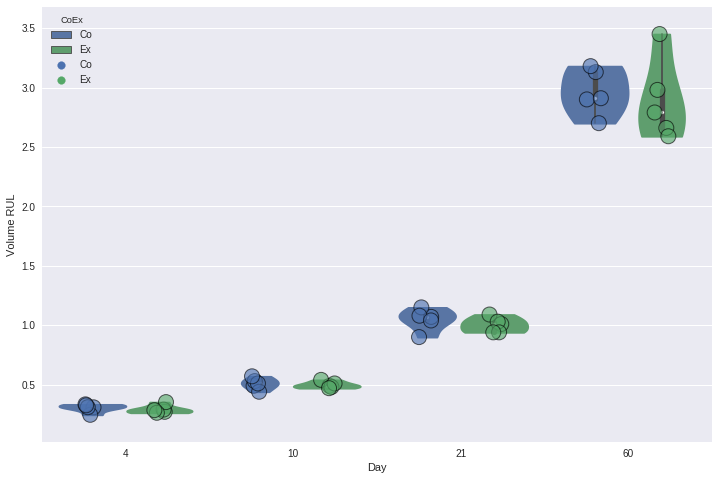

In [14]:
seaborn.violinplot(data=df, x='Day', y='Volume RUL', hue='CoEx', cut=0)
seaborn.stripplot(data=df, x='Day', y='Volume RUL', hue='CoEx', split=True, jitter=True,
                  s=15, alpha=0.618, edgecolor='k', linewidth=1)
plt.savefig(os.path.join(imgdir, 'rul.png'), bbox_inches='tight')
plt.show()

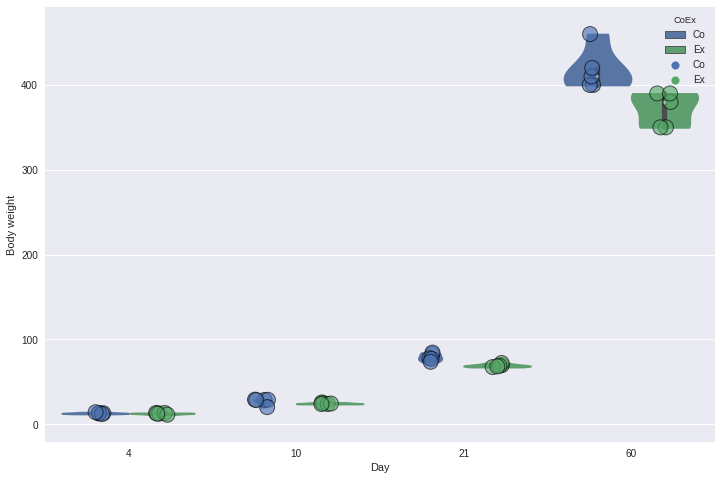

In [15]:
seaborn.violinplot(data=df, x='Day', y='Body weight', hue='CoEx', cut=0)
seaborn.stripplot(data=df, x='Day', y='Body weight', hue='CoEx',
                  jitter=True, s=15, alpha=0.618, edgecolor='k', linewidth=1, split=True)
plt.savefig(os.path.join(imgdir, 'bodyweight.png'), bbox_inches='tight')
plt.show()

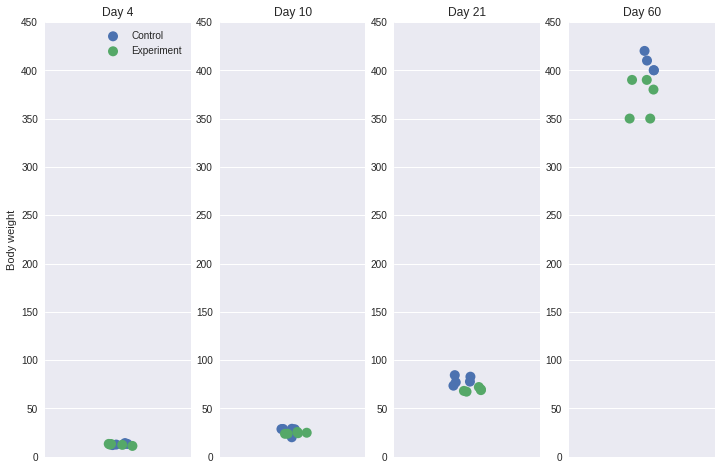

In [16]:
# Body weight
for c, i in enumerate([day04, day10, day21, day60]):
    plt.subplot(1, 4, c + 1)
    seaborn.stripplot(i.loc[i.CoEx == 'Co']['Body weight'], jitter=True,
                      orient='v', color=seaborn.color_palette()[0],
                      label='Control', s=10)
    seaborn.stripplot(i.loc[i.CoEx == 'Ex']['Body weight'], jitter=True,
                      orient='v', color=seaborn.color_palette()[1],
                      label='Experiment', s=10)
    plt.title('Day %s' % i.index[0].split('-')[-1][:-1])
    if c:
        plt.gca().yaxis.label.set_visible(False)
    else:
        plt.legend(loc='best')
    plt.ylim([0, 450])
plt.show()

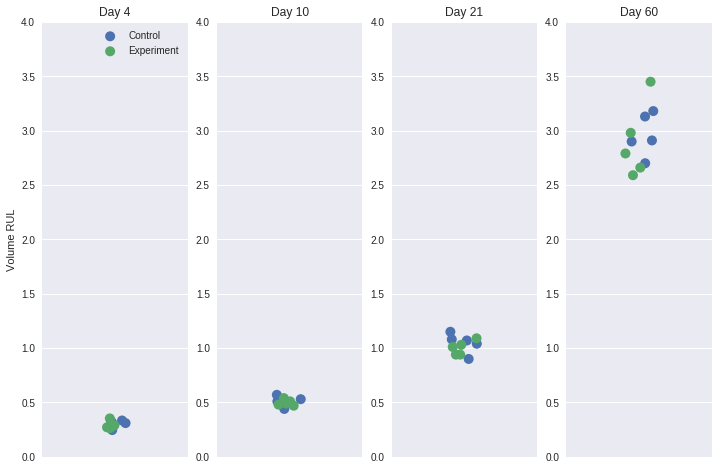

In [18]:
# Body weight
for c, i in enumerate([day04, day10, day21, day60]):
    plt.subplot(1, 4, c + 1)
    seaborn.stripplot(i.loc[i.CoEx == 'Co']['Volume RUL'], jitter=True,
                      orient='v', color=seaborn.color_palette()[0],
                      label='Control', s=10)
    seaborn.stripplot(i.loc[i.CoEx == 'Ex']['Volume RUL'], jitter=True,
                      orient='v', color=seaborn.color_palette()[1],
                      label='Experiment', s=10)
    plt.title('Day %s' % i.index[0].split('-')[-1][:-1])
    if c:
        plt.gca().yaxis.label.set_visible(False)
    else:
        plt.legend(loc='best')
    plt.ylim([0, 4])
plt.show()